In [1]:
'''
The first 8 cells here are importing and visualisation for the entire set. 9 and on are for specific variables.
'''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from numpy import nan as NA #this makes dropna work
import scipy.stats as ss
matplotlib.style.use('ggplot')
%matplotlib inline
from pprint import pprint
from sklearn.linear_model import LinearRegression

df = pd.read_csv('C:\\Users\\user\\Desktop\\Revature\\Projects\\Housing\\train.csv')

print(df.shape)
print(df.describe(include=['object']))


(1460, 81)
       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA      

In [2]:
df.describe(include=['int64'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


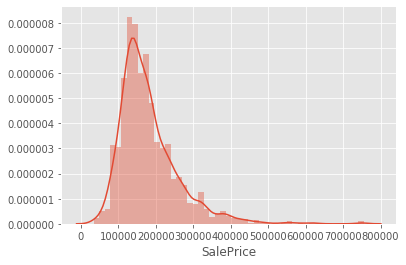

In [3]:
target = df['SalePrice']
print(target.head())
sns.distplot(target, hist=True)

In [4]:
target_log = np.log(target)

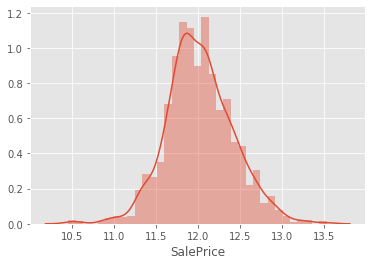

In [5]:
sns.distplot(target_log, hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223BD85CC48>,
      dtype=object)

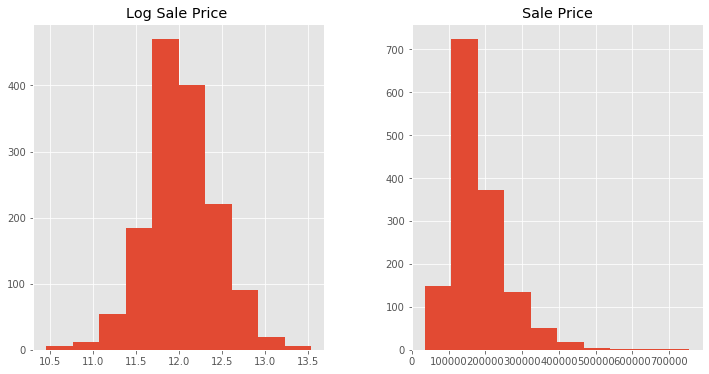

In [6]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0) #rcparams allows you to set a default size
prices = pd.DataFrame({"Sale Price":df["SalePrice"],"Log Sale Price ":target_log})
prices.hist()

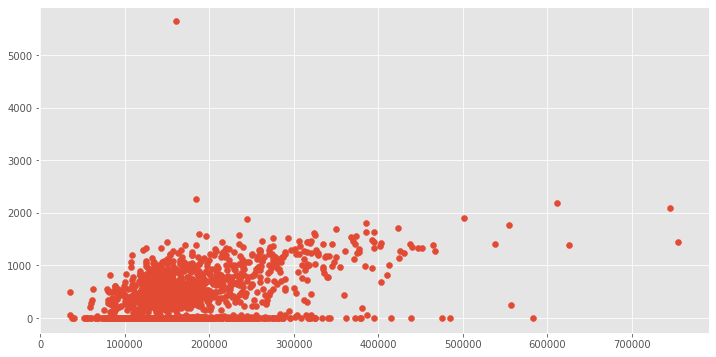

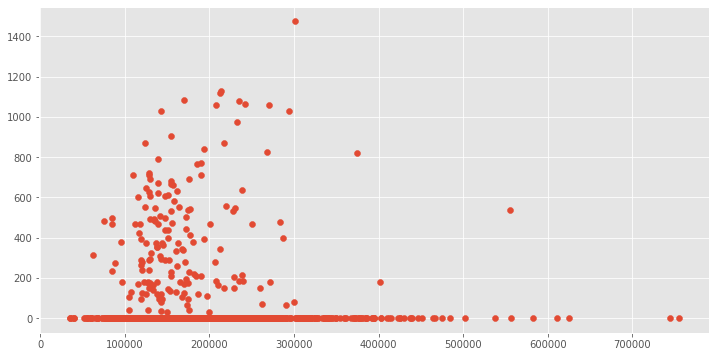

In [7]:
plt.scatter(df['SalePrice'], df['BsmtFinSF1'])
plt.show()
plt.scatter(df['SalePrice'], df['BsmtFinSF2'])
plt.show()

In [8]:
#MSSubClass=The building class
df['MSSubClass'] = df['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df['OverallCond'] = df['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [9]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
df = df.drop(["TotalBsmtSF"], axis=1)
df = df.drop(["1stFlrSF"], axis=1)
df = df.drop(["2ndFlrSF"], axis=1)
df = df.drop(["Id"], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


In [10]:
aFewCats = df[['RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType']] #These are a few categorical variables
print(aFewCats.head()) #We take a peak at what the variables look like. From this we can see they're categorical.
print(aFewCats.tail())
print(aFewCats.nunique()) #Seeing the total number of unique entries gives us an idea of the variety and how we might chart them.


RoofMatl Exterior1st Exterior2nd MasVnrType
0  CompShg     VinylSd     VinylSd    BrkFace
1  CompShg     MetalSd     MetalSd       None
2  CompShg     VinylSd     VinylSd    BrkFace
3  CompShg     Wd Sdng     Wd Shng       None
4  CompShg     VinylSd     VinylSd    BrkFace
     RoofMatl Exterior1st Exterior2nd MasVnrType
1455  CompShg     VinylSd     VinylSd       None
1456  CompShg     Plywood     Plywood      Stone
1457  CompShg     CemntBd     CmentBd       None
1458  CompShg     MetalSd     MetalSd       None
1459  CompShg     HdBoard     HdBoard       None
RoofMatl        8
Exterior1st    15
Exterior2nd    16
MasVnrType      4
dtype: int64


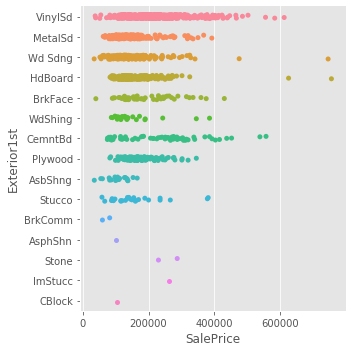

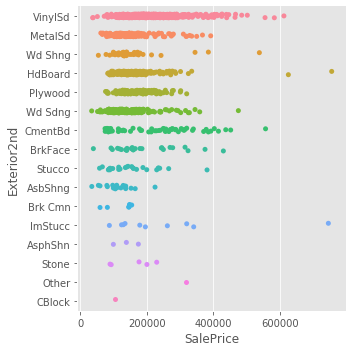

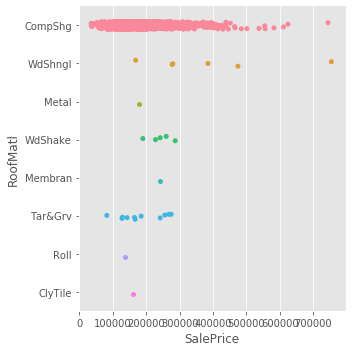

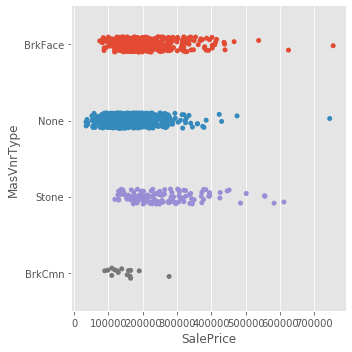

In [11]:
sns_plot = sns.catplot(x="SalePrice", y="Exterior1st", data=df);
#The spread looks similar enough between the categories that we can guess there is very little correlation.
#There also appear to be few outliers.
sns.catplot(x="SalePrice", y="Exterior2nd", data=df);
sns.catplot(x="SalePrice", y="RoofMatl", data=df);
sns.catplot(x="SalePrice", y="MasVnrType", data=df);
sns_plot.savefig('output.png')
#Stone appears to have a slightly higher sale price on average

In [12]:
freq_matrix = pd.crosstab(df["Exterior1st"], df["Exterior2nd"])
#Each row is Exterior1st matched against Exterior2nd as the columns. We can see that the majority of entries match, so one of these variables can probably be left out in our PCA.
print(freq_matrix)
print(df['Exterior1st'].value_counts())
print(df['Exterior2nd'].value_counts())


Exterior2nd  AsbShng  AsphShn  Brk Cmn  BrkFace  CBlock  CmentBd  HdBoard  \
Exterior1st                                                                 
AsbShng           17        0        0        0       0        0        0   
AsphShn            0        1        0        0       0        0        0   
BrkComm            0        0        2        0       0        0        0   
BrkFace            1        0        0       24       0        0        3   
CBlock             0        0        0        0       1        0        0   
CemntBd            0        0        0        0       0       59        0   
HdBoard            0        1        0        0       0        0      193   
ImStucc            0        0        0        0       0        0        0   
MetalSd            0        1        0        0       0        0        3   
Plywood            0        0        5        0       0        0        2   
Stone              0        0        0        0       0        0        1   

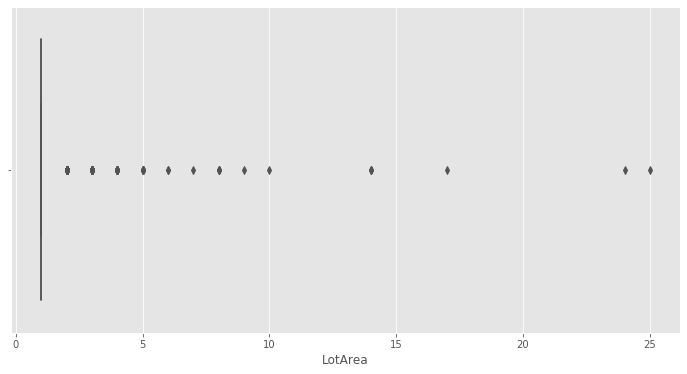

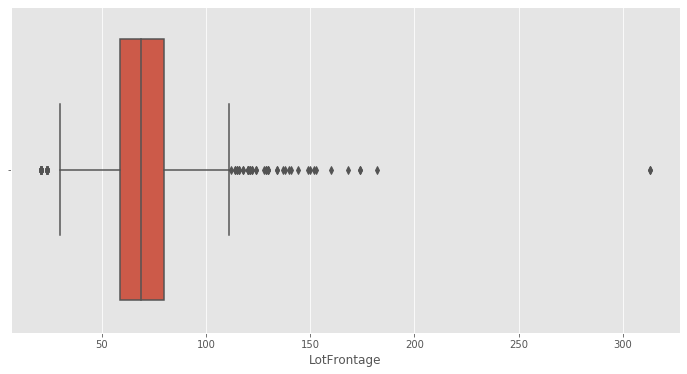

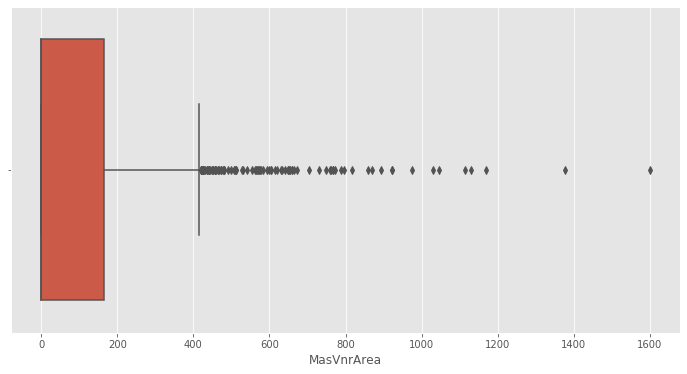

In [13]:
lotArea = df['LotArea'].value_counts()
sns.boxplot(lotArea)
plt.show()
sns.boxplot(df['LotFrontage']) #We see one significant outlier
plt.show()
sns.boxplot(df['MasVnrArea'])
plt.show()

In [0]:
plt.scatter(df['SalePrice'], df['LotArea']) #There's little to no visible correlation here.
plt.show()
plt.scatter(df['SalePrice'], df['LotFrontage']) #This correlation might be meaningful as well as the next one.
plt.show()                                      #The correlation is weak, but LotFrontage might be important.
plt.scatter(df['SalePrice'], df['MasVnrArea'])  #LotArea is probably not very important.
plt.show()

In [0]:
plt.scatter(df['LotArea'], df['LotFrontage'])
#LotFrontage is on the left, LotArea is on the bottom.
#This compares 'Linear feet of street connected to property' to 'Lot size in square feet.'
#The correlation is surprisingly weak. We should probably keep both until further dimensionality reduction.

0.40088201455448025

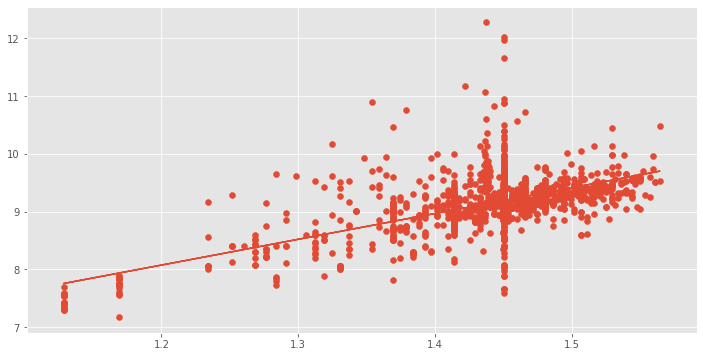

In [30]:
X = np.log(df['LotFrontage'].fillna(0)).values.reshape(-1,1)
Y = np.log(df['LotArea'].fillna(0)).values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, Y)
y_pred = reg.predict(X)
plt.scatter(X, Y)
prettyplot = plt.plot(X, y_pred)
reg.score(X, Y)
#I made a linear regression of the log of the two sets to make sure. There is some correlation but it's not very strong.

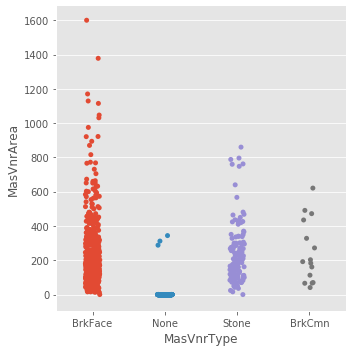

In [31]:
sns.catplot(x="MasVnrType", y="MasVnrArea", data=df);
#The correlation appears weak. BrckFace varies to higher area.

In [32]:
#Find the number missing...
missingMasVnr = df['MasVnrType'].isnull().sum()
missingExt1st = df['Exterior1st'].isnull().sum()
missingExt2nd = df['Exterior2nd'].isnull().sum()
missingRoofMatl = df['RoofMatl'].isnull().sum()

print(missingMasVnr)
print(missingExt1st)
print(missingExt2nd)

8
0
0


In [33]:
missingLotArea = df['LotArea'].isnull().sum()
missingLotFrontage = df['LotFrontage'].isnull().sum()
missingMas = df['MasVnrArea'].isnull().sum()
#These are out of 1459, so they're fine. We can impute them.

print(missingLotArea)
print(missingLotFrontage)
print(missingMas)

0
0
8


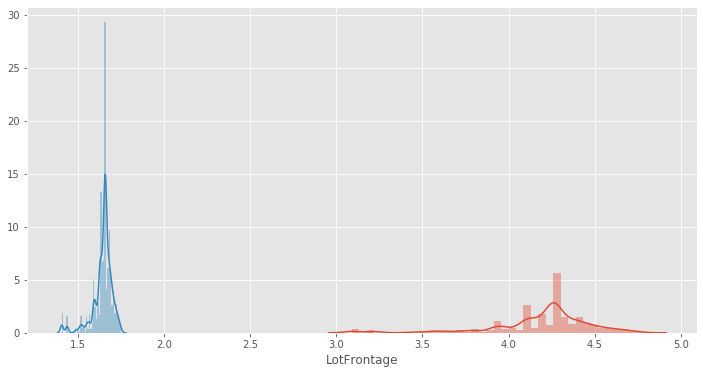

In [34]:
sns.distplot(df['LotFrontage'], hist=True)
df['LotFrontage'] = np.log(df['LotFrontage'] + 1)
sns.distplot(df['LotFrontage'], hist=True)

In [35]:
#Imputing for missing numbers.
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mode(), inplace=True)
print(df.loc[0:20])

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL     1.646667     8450   Pave   NaN      Reg   
1          20       RL     1.685370     9600   Pave   NaN      Reg   
2          60       RL     1.655196    11250   Pave   NaN      IR1   
3          70       RL     1.631370     9550   Pave   NaN      IR1   
4          60       RL     1.694266    14260   Pave   NaN      IR1   
5          50       RL     1.696413    14115   Pave   NaN      IR1   
6          20       RL     1.673489    10084   Pave   NaN      Reg   
7          60       RL     1.660774    10382   Pave   NaN      IR1   
8          50       RM     1.599639     6120   Pave   NaN      Reg   
9         190       RL     1.595709     7420   Pave   NaN      Reg   
10         20       RL     1.660640    11200   Pave   NaN      Reg   
11         60       RL     1.696413    11924   Pave   NaN      IR1   
12         20       RL     1.660774    12968   Pave   NaN      IR2   
13         20       RL 

In [36]:
    Q1 = df['LotFrontage'].quantile(.25)
    Q3 = df['LotFrontage'].quantile(.75)
    IQR = Q3 - Q1

    for entry in df['LotFrontage']:
        if entry > (Q3 + 1.5 * IQR):
            df['LotFrontage'].replace(entry, df['LotFrontage'].mean(), inplace = True)

    df['LotFrontage'].clip(0,(Q3 + 1.5 *IQR))

0       1.646667
1       1.685370
2       1.655196
3       1.631370
4       1.694266
          ...   
1455    1.637663
1456    1.696413
1457    1.649561
1458    1.655196
1459    1.673489
Name: LotFrontage, Length: 1460, dtype: float64

In [37]:
#We can check for numeric data to get an idea of which columns are categorical and which will be numeric.
#We can draw regression lines with the numeric data and reduce dimensions based on their correlations.
cols = df.columns
num_cols = df._get_numeric_data().columns
#num = list(num_cols)
non_num = list(set(cols) - set(num_cols))

print(num_cols)
print(non_num)

print(df[num_cols])
#print(df[non_num])

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'TotalSF'],
      dtype='object')
['KitchenQual', 'Neighborhood', 'ExterCond', 'MSZoning', 'Heating', 'CentralAir', 'Fence', 'SaleType', 'LotConfig', 'PavedDrive', 'Condition1', 'SaleCondition', 'HouseStyle', 'MSSubClass', 'Electrical', 'ExterQual', 'BldgType', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'RoofStyle', 'Exterior2nd', 'Exterior1st', 'BsmtCond', 'Condition2', 'YrSold', 'GarageCond', 'MiscFeature', 'LandSlope', 'HeatingQC', 'PoolQC', 'Functional', 'BsmtExposure', 'Street', 'RoofMatl', 'Foundation', 'GarageTy

In [38]:
#This shows the correlation between each numeric variable. It will, of course, have 1.0 correlation with itself.
#It will be more practical to visualize with seaborn. To reduce dimensions, we should do PCA or a similar technique.
corr = df[num_cols].corr()
print(corr)

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  \
LotFrontage       1.000000  0.212683     0.175395   0.076764      0.045862   
LotArea           0.212683  1.000000     0.105806   0.014228      0.013788   
OverallQual       0.175395  0.105806     1.000000   0.572323      0.550684   
YearBuilt         0.076764  0.014228     0.572323   1.000000      0.592855   
YearRemodAdd      0.045862  0.013788     0.550684   0.592855      1.000000   
MasVnrArea        0.125323  0.104160     0.411876   0.315707      0.179618   
BsmtFinSF1        0.117022  0.214103     0.239666   0.249503      0.128451   
BsmtFinSF2        0.031486  0.111170    -0.059119  -0.049107     -0.067759   
BsmtUnfSF         0.140718 -0.002618     0.308159   0.149040      0.181133   
LowQualFinSF      0.000306  0.004779    -0.030429  -0.183784     -0.062419   
GrLivArea         0.272726  0.263116     0.593007   0.199010      0.287389   
BsmtFullBath      0.039620  0.158155     0.111098   0.187599      0.119470   
B

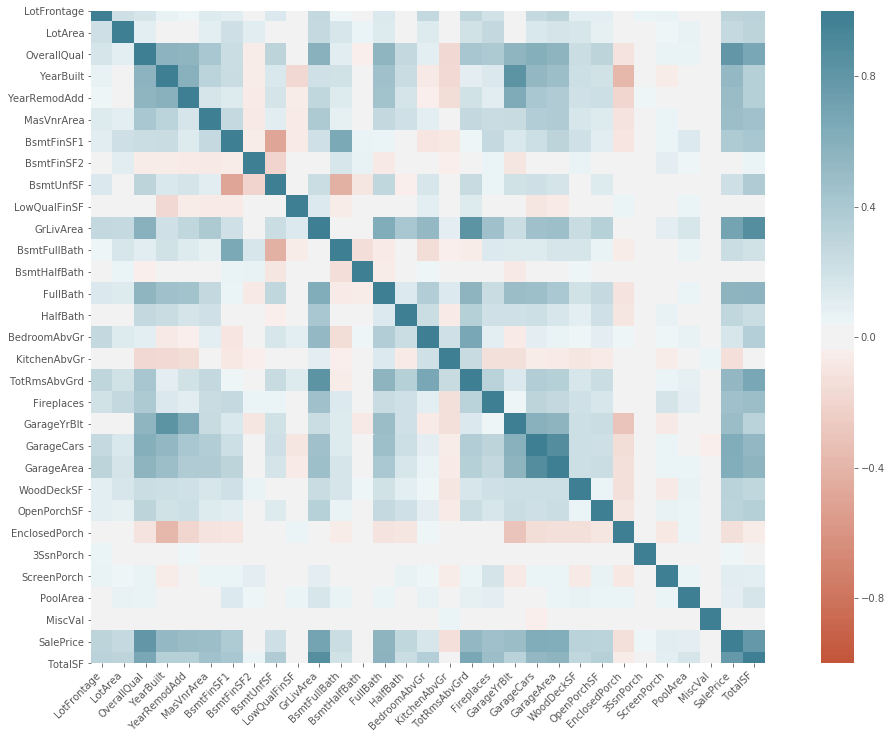

In [39]:
plt.figure(figsize=(20,12))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [40]:
# save all categorical columns in list
categorical_columns = [col for col in df.columns.values if df[col].dtype == 'object']

# dataframe with categorical features
df_cat = df[categorical_columns]
# dataframe with numerical features
df_num = df.drop(categorical_columns, axis=1)

In [41]:
df_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.646197,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,2567.048630
std,0.058048,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,821.714421
min,1.408800,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,334.000000
25%,1.631370,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,2009.500000
50%,1.660774,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,2474.000000
75%,1.675938,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,3004.000000
max,1.748318,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,11752.000000


In [42]:
pd.get_dummies(df['Exterior1st'])
pd.get_dummies(df['RoofMatl'])
pd.get_dummies(df['MasVnrType'])

,BrkCmn,BrkFace,None,Stone
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,0,1
1457,0,0,1,0
1458,0,0,1,0


In [43]:
    ex1st = pd.get_dummies(df['Exterior1st'])
    roof = pd.get_dummies(df['RoofMatl'])
    mast = pd.get_dummies(df['MasVnrType'])

    features = pd.concat([ex1st, roof, mast], axis=1)
    print(features.head())

AsbShng  AsphShn  BrkComm  BrkFace  CBlock  CemntBd  HdBoard  ImStucc  \
0        0        0        0        0       0        0        0        0   
1        0        0        0        0       0        0        0        0   
2        0        0        0        0       0        0        0        0   
3        0        0        0        0       0        0        0        0   
4        0        0        0        0       0        0        0        0   

   MetalSd  Plywood  ...  Membran  Metal  Roll  Tar&Grv  WdShake  WdShngl  \
0        0        0  ...        0      0     0        0        0        0   
1        1        0  ...        0      0     0        0        0        0   
2        0        0  ...        0      0     0        0        0        0   
3        0        0  ...        0      0     0        0        0        0   
4        0        0  ...        0      0     0        0        0        0   

   BrkCmn  BrkFace  None  Stone  
0       0        1     0      0  
1       0      